In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Automobile_data.csv', usecols=['horsepower', 'price'])

In [3]:
df.head()

,horsepower,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  205 non-null    object
 1   price       205 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [4]:
#Mengetahui jumlah kolom dan baris dari data.
df.shape

(205, 2)

In [24]:
df['horsepower'].replace('?','0', inplace=True)
df['price'].replace('?','0', inplace=True)

In [26]:
df['horsepower'] = [int(x) for x in df['horsepower']]
df['price'] = [int(x) for x in df['price']]

In [27]:
df.describe()

,horsepower,price
count,205.000000,205.000000
mean,103.239024,12949.429268
std,40.832470,8079.043284
min,0.000000,0.000000
25%,70.000000,7689.000000
50%,95.000000,10198.000000
75%,116.000000,16500.000000
max,288.000000,45400.000000


In [28]:
df.isnull().sum()

horsepower    0
price         0
dtype: int64

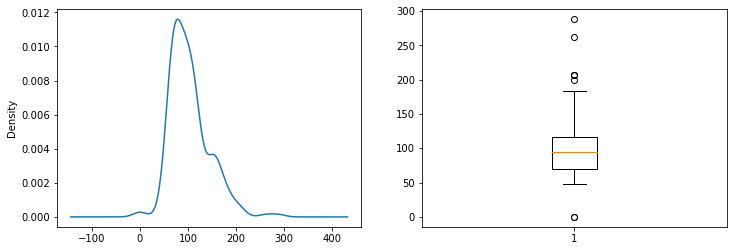

In [29]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

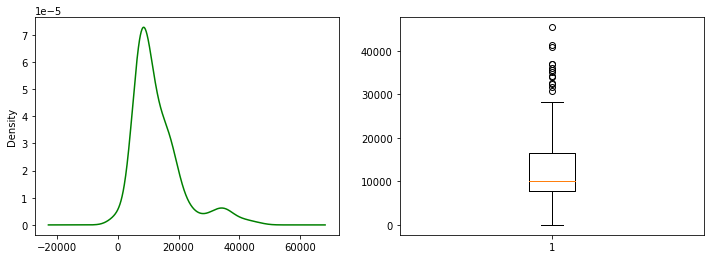

In [30]:
#Univariate analysis price.
#Melihat distribusi dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

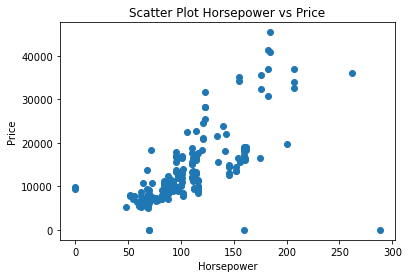

In [31]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [32]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.691288
price,0.691288,1.000000


In [33]:
#buat variabel x dan y.
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [34]:
#sisihkan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
#membuat object model
lin_reg = LinearRegression()

In [36]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#print coefisieen dan intercept
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[121.27785362]]
[220.40721986]


In [38]:
lin_reg.score(x_test, y_test)

0.650002654461743

Text(0.5, 1.0, 'Plot Horsepower vs Price')

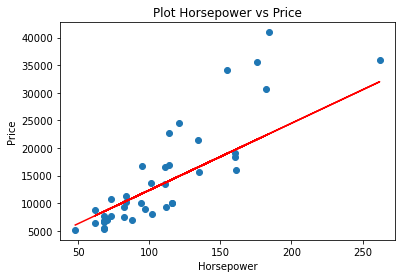

In [39]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

#sumber : https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf